# EDA on Top Apps on Google Playstore

In recent times, A lot of apps have found their way into Google play store. Some of which are very beneficial while others are not. In this analysis we will be looking at the top apps on Google play. And we will be answering some questions based on our analysis of the data provided.

## Downloading the Dataset

The dataset i will be using is gotten from [Kaggle](https://www.kaggle.com/datasets/alexandrparkhomenko/top-apps-in-google-play). It contains 70 rows and 10 columns. The columns contained include
1. Unamed 0(we will rename this later)
2. App Name
3. App Id
4. Category
5. Developer Id
6. Developer website
7. Developer Email
8. Content Rating
9. Ad Supported
10. In App Purchase

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# we have to give our dataset link a varible name
dataset_url = 'https://www.kaggle.com/datasets/alexandrparkhomenko/top-apps-in-google-play'  

In [3]:
# downloading our dataset into the enviroment with "opendataset" library
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nuel000
Your Kaggle Key: ········


100%|██████████| 3.08k/3.08k [00:00<00:00, 2.61MB/s]

The dataset has been downloaded and extracted.

In [4]:
# lets load the dataset from the directory
data_dir = './top-apps-in-google-play'

In [5]:
import os
os.listdir(data_dir)

['Top-Apps-in-Google-Play.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "EDA on top apps on Google play"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "momohemmanuel370/eda-on-top-apps-on-google-play" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/momohemmanuel370/eda-on-top-apps-on-google-play


'https://jovian.ai/momohemmanuel370/eda-on-top-apps-on-google-play'

## Data Preparation and Cleaning

We are going to load the dataset into data frame using pandas, explore by checking the number of rows and columns and handle missing values(if any)



In [10]:
# lets install pandas library to read csv file

!pip install pandas
import pandas as pd

apps = pd.read_csv(data_dir + '/Top-Apps-in-Google-Play.csv')
apps

,Unnamed: 0,App Name,App Id,Category,Developer Id,Developer Website,Developer Email,Content Rating,Ad Supported,In App Purchases
0,1,Google Play services,com.google.android.gms,Tools,Google LLC,https://developers.google.com/android/google-p...,apps-help@google.com,Everyone,False,False
1,2,YouTube,com.google.android.youtube,Video Players & Editors,Google LLC,https://support.google.com/youtube/topic/24225...,ytandroid-support@google.com,Teen,True,False
2,3,Google,com.google.android.googlequicksearchbox,Tools,Google LLC,https://www.google.com/search/about/,apps-help@google.com,Everyone,True,False
3,4,Google Maps - Navigate & Explore,com.google.android.apps.maps,Travel & Local,Google LLC,http://maps.google.com/about/,apps-help@google.com,Everyone,True,False
4,5,Google Text-to-Speech,com.google.android.tts,Tools,Google LLC,http://www.google.com/,tts-feedback@google.com,Everyone,False,False
...,...,...,...,...,...,...,...,...,...,...
65,66,Clock,com.google.android.deskclock,Tools,Google LLC,http://www.google.com/,android-clock-feedback@google.com,Everyone,False,False
66,67,Spotify: Listen to podcasts & find music you love,com.spotify.music,Music & Audio,Spotify Ltd.,https://www.spotify.com,android-support@spotify.com,Teen,True,False
67,68,Google Translate,com.google.android.apps.translate,Tools,Google LLC,http://support.google.com/translate,translate-mobile-support@google.com,Everyone,False,False
68,69,Samsung Notes,com.samsung.android.app.notes,Productivity,"Samsung Electronics Co., Ltd.",https://samsung.com,noreply.sec@samsung.com,Everyone,False,False


In [11]:
# lets look at the shape of data
apps.shape

(70, 10)

In [12]:
#checking column names

apps.columns

Index(['Unnamed: 0', 'App Name', 'App Id', 'Category', 'Developer Id',
       'Developer Website', 'Developer Email', 'Content Rating',
       'Ad Supported', 'In App Purchases'],
      dtype='object')

In [13]:
# checking info
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         70 non-null     int64 
 1   App Name           70 non-null     object
 2   App Id             70 non-null     object
 3   Category           70 non-null     object
 4   Developer Id       70 non-null     object
 5   Developer Website  70 non-null     object
 6   Developer Email    70 non-null     object
 7   Content Rating     70 non-null     object
 8   Ad Supported       70 non-null     bool  
 9   In App Purchases   70 non-null     bool  
dtypes: bool(2), int64(1), object(7)
memory usage: 4.6+ KB


In [14]:
# we can see that the column name 'unnamed' is just the serial number, so we will change that

apps = apps.rename(columns={'Unnamed: 0': 'S/N'})
apps

,S/N,App Name,App Id,Category,Developer Id,Developer Website,Developer Email,Content Rating,Ad Supported,In App Purchases
0,1,Google Play services,com.google.android.gms,Tools,Google LLC,https://developers.google.com/android/google-p...,apps-help@google.com,Everyone,False,False
1,2,YouTube,com.google.android.youtube,Video Players & Editors,Google LLC,https://support.google.com/youtube/topic/24225...,ytandroid-support@google.com,Teen,True,False
2,3,Google,com.google.android.googlequicksearchbox,Tools,Google LLC,https://www.google.com/search/about/,apps-help@google.com,Everyone,True,False
3,4,Google Maps - Navigate & Explore,com.google.android.apps.maps,Travel & Local,Google LLC,http://maps.google.com/about/,apps-help@google.com,Everyone,True,False
4,5,Google Text-to-Speech,com.google.android.tts,Tools,Google LLC,http://www.google.com/,tts-feedback@google.com,Everyone,False,False
...,...,...,...,...,...,...,...,...,...,...
65,66,Clock,com.google.android.deskclock,Tools,Google LLC,http://www.google.com/,android-clock-feedback@google.com,Everyone,False,False
66,67,Spotify: Listen to podcasts & find music you love,com.spotify.music,Music & Audio,Spotify Ltd.,https://www.spotify.com,android-support@spotify.com,Teen,True,False
67,68,Google Translate,com.google.android.apps.translate,Tools,Google LLC,http://support.google.com/translate,translate-mobile-support@google.com,Everyone,False,False
68,69,Samsung Notes,com.samsung.android.app.notes,Productivity,"Samsung Electronics Co., Ltd.",https://samsung.com,noreply.sec@samsung.com,Everyone,False,False


In [15]:
# for this analysis i wouldnt be needing all columns, so its best to select what i need. I'll be needing the

#Category
#Developer ID
#Content rating
#Ads suportted and
#Ads in purchase for now

apps_df = apps[['Category', 'Developer Id','Content Rating','Ad Supported', 'In App Purchases' ]]
apps_df

,Category,Developer Id,Content Rating,Ad Supported,In App Purchases
0,Tools,Google LLC,Everyone,False,False
1,Video Players & Editors,Google LLC,Teen,True,False
2,Tools,Google LLC,Everyone,True,False
3,Travel & Local,Google LLC,Everyone,True,False
4,Tools,Google LLC,Everyone,False,False
...,...,...,...,...,...
65,Tools,Google LLC,Everyone,False,False
66,Music & Audio,Spotify Ltd.,Teen,True,False
67,Tools,Google LLC,Everyone,False,False
68,Productivity,"Samsung Electronics Co., Ltd.",Everyone,False,False


In [16]:
# lastly lets examine dataframe for missing values

In [17]:
apps_df.isnull().sum()

# fortunately, there are no null values

Category            0
Developer Id        0
Content Rating      0
Ad Supported        0
In App Purchases    0
dtype: int64

In [18]:
import jovian

In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "momohemmanuel370/eda-on-top-apps-on-google-play" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/momohemmanuel370/eda-on-top-apps-on-google-play


'https://jovian.ai/momohemmanuel370/eda-on-top-apps-on-google-play'

## Exploratory Analysis and Visualization

Now we are going to take a look at how popular apps are based on Category, Content rating, Developer ID, and Ads supported.

We will preference  Apps under;

* Content Rating
* Category
* Developer ID,
* Ads supported.




Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Lets look at the distribution of apps based on their category on Playstore

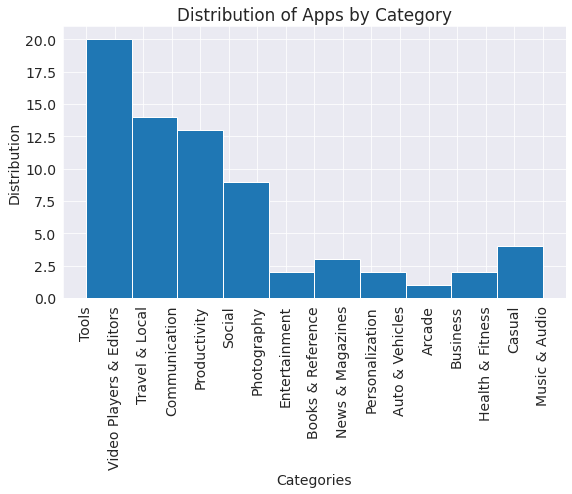

In [21]:
# Lets use a histogram to see the distribution of apps by catergory
apps_df['Category'].hist()
plt.xticks(rotation=90);
plt.xlabel('Categories')
plt.ylabel('Distribution')
plt.title('Distribution of Apps by Category');

From our viz above its obvious that the most popular categories are the tools.

**TODO** - Lets look at the Developers Id, and which of the is more popular

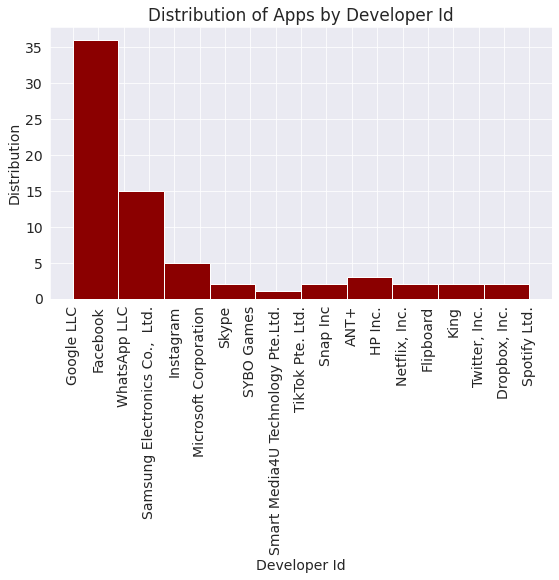

In [22]:
apps_df['Developer Id'].hist(color = "darkred")
plt.xticks(rotation=90);
plt.xlabel('Developer Id')
plt.ylabel('Distribution')
plt.title('Distribution of Apps by Developer Id');

Google LLC seems to be more popular than others

**TODO** - Distribution by app content

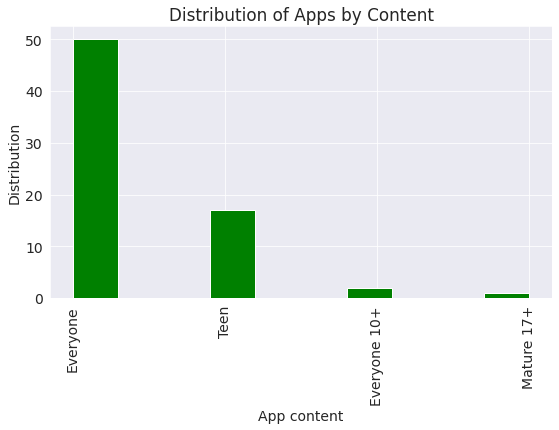

In [23]:
# Lets use a histogram to see the distribution of apps by content Rating
apps_df['Content Rating'].hist(color ='green')
plt.xticks(rotation=90);
plt.xlabel('App content')
plt.ylabel('Distribution')
plt.title('Distribution of Apps by Content');

**TODO** - Lets also see how ads with ads and without are distributed

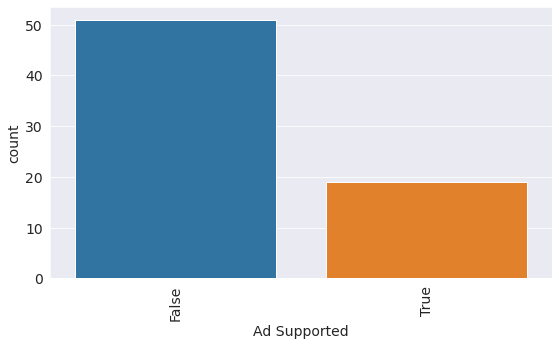

In [36]:
# Lets use a barchat to see how apps with and wihtout ads are distributed 
sns.countplot(x='Ad Supported', data=apps_df)
plt.xticks(rotation=90);

As we can see above apps without ads are more than those with ads

Let us save and upload our work to Jovian before continuing

In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "momohemmanuel370/eda-on-top-apps-on-google-play" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/momohemmanuel370/eda-on-top-apps-on-google-play


'https://jovian.ai/momohemmanuel370/eda-on-top-apps-on-google-play'

## Asking and Answering Questions

TODO - Now, we are going to be asking some questions to determine the popularity of apps on playstore



#### Q1: Which Developer has the Largest number of apps on Google Play?

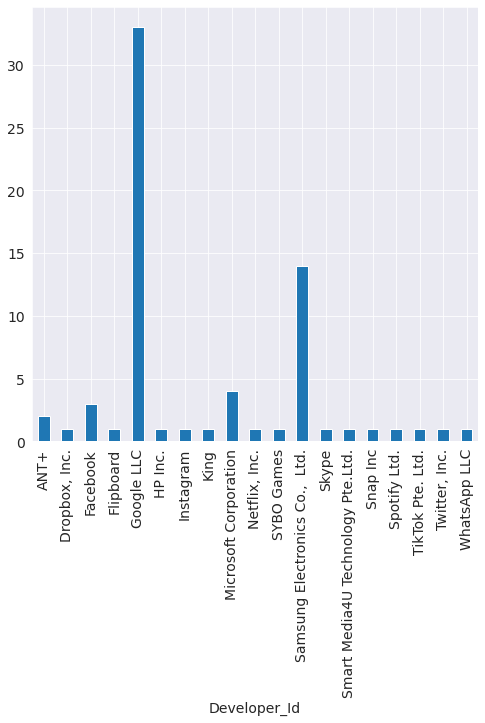

In [63]:
# Lets count apps by developer ID
Dev_id = apps_df.groupby('Developer_Id')['Developer_Id'].count()

#plotting this result

Dev_id.plot(kind='bar', figsize=(8,8));

Its very Obvious that Google LLC has the highest number of apps

#### Q2: What Category of App is the most popular on Playstore?

In [103]:
# Lets count the category of apps
Category_count = apps_df.groupby('Category')['Category'].count()
Category_count

Category
Arcade                      1
Auto & Vehicles             1
Books & Reference           1
Business                    1
Casual                      1
Communication              12
Entertainment               2
Health & Fitness            1
Music & Audio               3
News & Magazines            2
Personalization             1
Photography                 2
Productivity               13
Social                      7
Tools                      18
Travel & Local              2
Video Players & Editors     2
Name: Category, dtype: int64

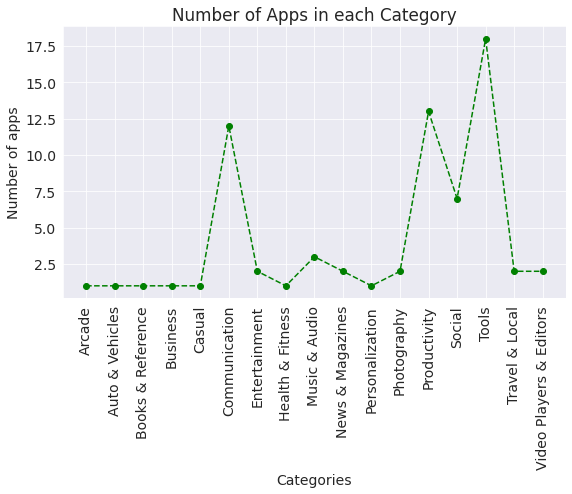

In [104]:
#lets visualize this result

plt.plot(Category_count, 'o--g')
plt.xlabel('Categories')
plt.ylabel('Number of apps')
plt.xticks(rotation=90)
plt.title('Number of Apps in each Category');

In [ ]:
# As we can see the 'Tools' has the most common category

#### Q3: How many apps with 'Everyone' Content Rating are produced by Google LLC?


In [40]:
# I replaced the spaces in the columns name with underscore so we can use it.

apps_df.columns = [c.replace(' ', '_') for c in apps_df.columns]
Google_Everyone = apps_df[(apps_df.Developer_Id == "Google LLC") & (apps_df.Content_Rating == "Everyone")]

In [50]:
Google_Everyone.count()

Category            24
Developer_Id        24
Content_Rating      24
Ad_Supported        24
In_App_Purchases    24
dtype: int64

we have 24 apps with 'Everyone' Rating produced by Google LLC

#### Q4: Which apps are more popular among apps with In app purchase or apps without In app Purchase?

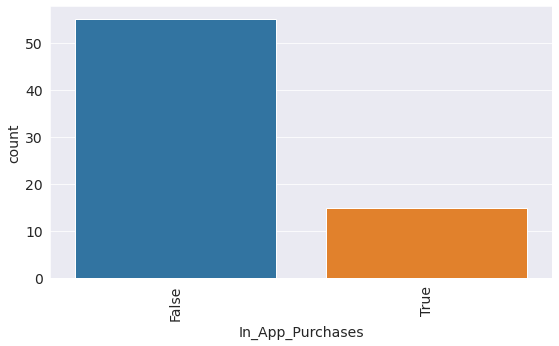

In [52]:
# Lets use a barchat to see which apps are more popular 
sns.countplot(x='In_App_Purchases', data=apps_df)
plt.xticks(rotation=90);

From our visualization above, we can see that, apps without In app purchase are more popular

#### Q5: How is content rating distributed among the number of apps available on Playstore?

In [54]:
# Lets count apps by content rating
Content_R = apps_df.groupby('Content_Rating')['Content_Rating'].count()

<AxesSubplot:ylabel='Content_Rating'>

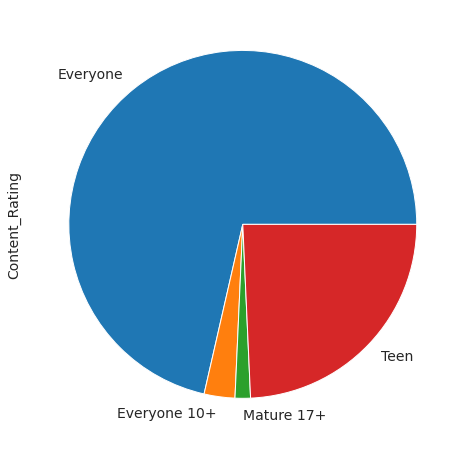

In [57]:
# Now lets plot using a pie chart to visualize
Content_R.plot(kind='pie', figsize=(8,8))

Wow! more than 50% of apps on Playstore has content rating for everyone

Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [64]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "momohemmanuel370/eda-on-top-apps-on-google-play" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/momohemmanuel370/eda-on-top-apps-on-google-play


'https://jovian.ai/momohemmanuel370/eda-on-top-apps-on-google-play'

## Inferences and Conclusion

 From the analysis carried on the dataset, the following inferences can be made

1. Google LLC has the highest number of apps on playstore.
2. The most popular content rating on Playstore is for everyone.
3. Most apps on playstore are categorized under tools.

In conclusion, most popular apps on playstore will either have 1 or more features of the inferences made above. 


In [30]:
import jovian

In [65]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "momohemmanuel370/eda-on-top-apps-on-google-play" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/momohemmanuel370/eda-on-top-apps-on-google-play


'https://jovian.ai/momohemmanuel370/eda-on-top-apps-on-google-play'

## References and Future Work

For now, we have only used this dataset from exploration and visualization, for future work the dataset can be used to build a model to predict apps that will most likely be popular on playstore, Also the data can be made robust by adding information such as number of downloads within a specific time frame, countries etc..this will help us draw more insightful conclusions when exploring the data. 

Here are some links that were of great support to this project

* [Coloring Histogram using Matplotlib](https://stackoverflow.com/questions/42172440/python-matplotlib-histogram-color)
* [Renaming Columns in Pandas frame](https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas)
* [Rotating text in Matplotlib](https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib)

In [32]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>